Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing the libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import shutil

In [2]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [3]:
# Unzipping the file
if os.path.exists("/content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration") and os.path.isdir("/content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration"):
  pass
else:
  !unzip -o drive/MyDrive/CNN_assignment.zip -d drive/MyDrive

Archive:  drive/MyDrive/CNN_assignment.zip
  inflating: drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010512.jpg  
  inflating: drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010889.jpg  
  inflating: drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024468.jpg  
  inflating: drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024470.jpg  
  inflating: drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024511.jpg  
  inflating: drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024646.jpg  
  inflating: drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024654.jpg  
  inflating: drive/MyDrive/Skin cancer I

In [4]:
# Defining the path for train and test images
data_dir_train = pathlib.Path("/content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('/content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [5]:
# Image count
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print("Number of images in training set are " ,image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print("Number of images in testing set are ",image_count_test)

Number of images in training set are  2239
Number of images in testing set are  118


In [6]:
# Setting seed to get reproducible results
from numpy.random import seed
seed(1)
tf.random.set_seed(2)

In [7]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [8]:
# Reading training data
train_ds = tf.keras.utils.image_dataset_from_directory(data_dir_train,label_mode='categorical',seed=123,batch_size=batch_size,image_size=(img_height,img_width),subset="training",validation_split=0.2)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [9]:
# Splitting the training data for validation
val_ds = tf.keras.utils.image_dataset_from_directory(data_dir_train,label_mode='categorical',seed=123,batch_size=batch_size,image_size=(img_height,img_width),validation_split=0.2,subset="validation")

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [10]:
# Class names
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


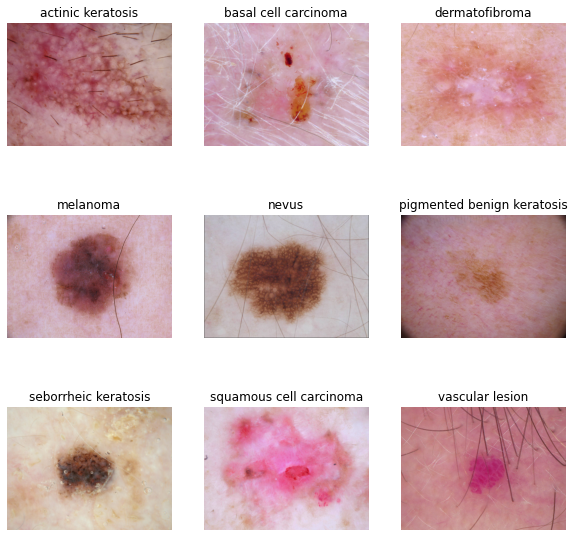

In [11]:
# Visualizing one instance of each class
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(10, 10))
for j,i in enumerate(class_names):
  image = os.path.join(data_dir_train,i,os.listdir(os.path.join(data_dir_train,i))[0])
  ax = plt.subplot(3, 3, j + 1)
  img = mpimg.imread(image)
  plt.imshow(img.astype("uint8"))
  plt.title(i)
  plt.axis("off")

In [12]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Model 1

In [13]:
### Your code goes here
model_1 = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(len(class_names),activation='softmax')
])


In [14]:
model_1.compile(optimizer="adam",
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 180, 180, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 90, 90, 64)       2

### Training model 1

In [16]:
epochs = 20
history = model_1.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 28s 98ms/step - loss: 1.8994 - accuracy: 0.4141 - val_loss: 6.8417 - val_accuracy: 0.0872
Epoch 2/20
56/56 [==============================] - 2s 43ms/step - loss: 1.3812 - accuracy: 0.5184 - val_loss: 8.7307 - val_accuracy: 0.0872
Epoch 3/20
56/56 [==============================] - 2s 42ms/step - loss: 1.2126 - accuracy: 0.5586 - val_loss: 7.6886 - val_accuracy: 0.0872
Epoch 4/20
56/56 [==============================] - 2s 42ms/step - loss: 1.0023 - accuracy: 0.6406 - val_loss: 4.5582 - val_accuracy: 0.2192
Epoch 5/20
56/56 [==============================] - 2s 42ms/step - loss: 0.8602 - accuracy: 0.6998 - val_loss: 4.6870 - val_accuracy: 0.1588
Epoch 6/20
56/56 [==============================] - 2s 42ms/step - loss: 0.6802 - accuracy: 0.7545 - val_loss: 3.2065 - val_accuracy: 0.2103
Epoch 7/20
56/56 [==============================] - 2s 43ms/step - loss: 0.5548 - accuracy: 0.7969 - val_loss: 3.3952 - val_accuracy: 0.3132
Epoch 8/20
5

### Visualizing training results

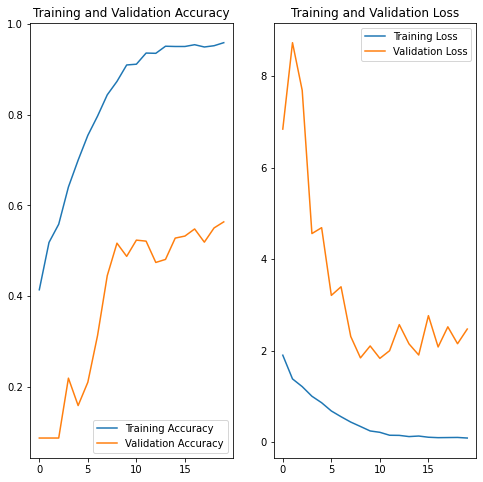

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Summary for model 1
#### At the end of 20 epochs the training accuracy is 95 and the validation accuracy is 52. This is a sign of overfitting which can be handled by regularization techniques such as data augmentation, dropout etc




In [18]:

# As the model is overfitting we can use data augmentation techniques
# Some of the techniques for augmentation are
# Random flip
# Random rotation
# Random zoom

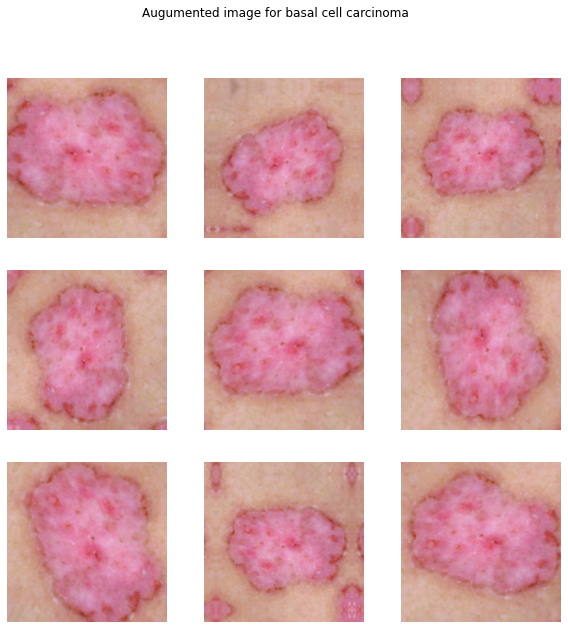

In [19]:
# Visualizing augmentation for one class instance
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal_and_vertical",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
  ]
)
fig=plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images,training=True)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")
plt.suptitle("Augumented image for " + class_names[list(labels[0]).index(1)])
plt.show()

### Model 2


In [20]:

model_2 = Sequential([
  data_augmentation,
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(len(class_names),activation='softmax')
])



### Compiling the model

In [21]:

model_2.compile(optimizer="adam",
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 32)      896       
                                                                 
 batch_normalization_3 (Batc  (None, 180, 180, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 90, 90, 32)       

### Training the model

In [22]:

epochs = 20
history = model_2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,use_multiprocessing=True
)

Epoch 1/20
56/56 [==============================] - 4s 54ms/step - loss: 2.2177 - accuracy: 0.3426 - val_loss: 4.8729 - val_accuracy: 0.1790
Epoch 2/20
56/56 [==============================] - 3s 49ms/step - loss: 1.5367 - accuracy: 0.4654 - val_loss: 4.3621 - val_accuracy: 0.1790
Epoch 3/20
56/56 [==============================] - 3s 48ms/step - loss: 1.4521 - accuracy: 0.4838 - val_loss: 5.9864 - val_accuracy: 0.1790
Epoch 4/20
56/56 [==============================] - 3s 50ms/step - loss: 1.3914 - accuracy: 0.4944 - val_loss: 4.4160 - val_accuracy: 0.1767
Epoch 5/20
56/56 [==============================] - 3s 50ms/step - loss: 1.3700 - accuracy: 0.4989 - val_loss: 4.8183 - val_accuracy: 0.1812
Epoch 6/20
56/56 [==============================] - 3s 50ms/step - loss: 1.3204 - accuracy: 0.5246 - val_loss: 6.1547 - val_accuracy: 0.1924
Epoch 7/20
56/56 [==============================] - 3s 51ms/step - loss: 1.2904 - accuracy: 0.5279 - val_loss: 3.2890 - val_accuracy: 0.2327
Epoch 8/20
56

### Visualizing the results

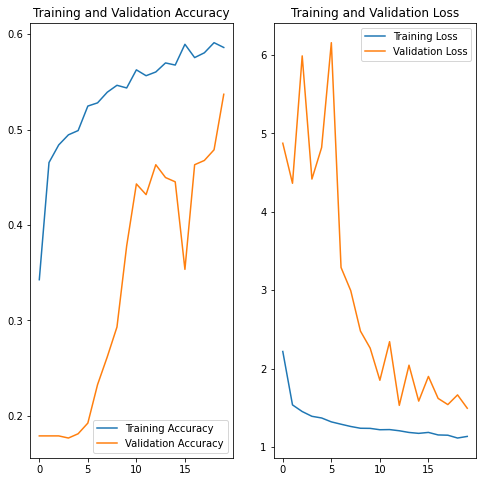

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Summary for Model - 2
#### The training and validation accuracy are close to each other which means that the model is generalizing well
#### From the results we can see that overfitting is reduced by the addition of dropout and augumentation layers
#### We can further improve the performance of the model by including more images which can be created by data augumentation

#### Distribution of classes in training data set

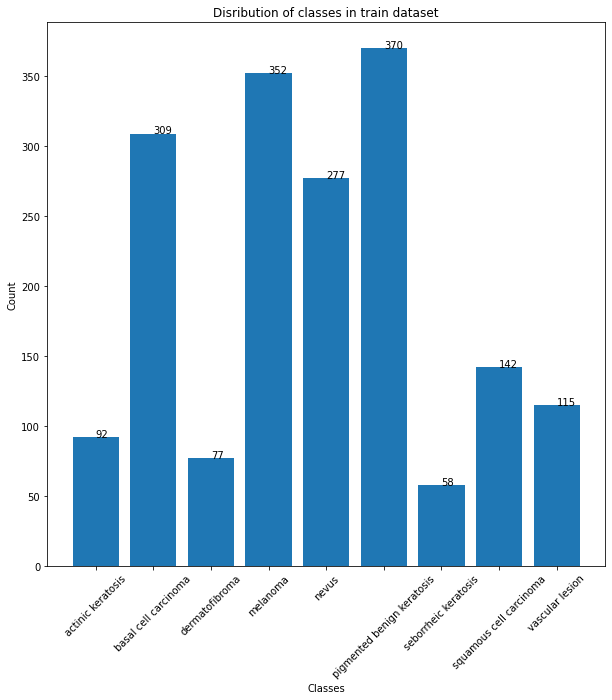

In [25]:
## Visualizing the distribution in the train data set
import matplotlib.pyplot as plt
label_count = [0]*len(class_names) # empty list for storing label count
for images, labels in train_ds:
  for image_label in labels:
    posn = list(image_label).index(1)
    label_count[posn] = label_count[posn]+1
plt.figure(figsize=(10, 10))
plt.bar(class_names,label_count)
plt.xlabel("Classes")
plt.ylabel("Count")
plt.xticks(rotation=45)
for i in range(len(class_names)):
        plt.text(i,label_count[i],label_count[i])
plt.title("Disribution of classes in train dataset")
plt.show()

#### - From the bar plot we can see that seborrheic keratosis has the least number of samples
#### - Melanoma, pigmented benign keratosis and basal cell carcinoma dominate the data

### Using Augmentor library for rectifying class imbalance

In [26]:
n_add = 500
path_to_training_dataset= "/content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration aug/Train/"
if os.path.exists("/content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration aug") and os.path.isdir("/content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration aug"):
  pass
else:
  shutil.copytree("/content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration", "/content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration aug")
  !pip install Augmentor
  import Augmentor
  for i in class_names:
      p = Augmentor.Pipeline(path_to_training_dataset + i)
      p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
      p.sample(n_add) ## Adding500 samples per class to make sure that none of the classes are sparse.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Initialised with 114 image(s) found.
Output directory set to /content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration aug/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F9CBC753210>: 100%|██████████| 500/500 [00:18<00:00, 26.48 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration aug/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F9CBC770CD0>: 100%|██████████| 500/500 [00:18<00:00, 27.69 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration aug/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F9D40349710>: 100%|██████████| 500/500 [00:18<00:00, 26.81 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration aug/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=919x802 at 0x7F9D4008EF10>: 100%|██████████| 500/500 [01:37<00:00,  5.12 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration aug/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=2592x1944 at 0x7F9D5A68FF10>: 100%|██████████| 500/500 [01:22<00:00,  6.08 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration aug/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F9CBC705610>: 100%|██████████| 500/500 [00:18<00:00, 27.21 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration aug/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7F9CC0A7C750>: 100%|██████████| 500/500 [00:40<00:00, 12.39 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration aug/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F9CD65FDC90>: 100%|██████████| 500/500 [00:17<00:00, 28.90 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration aug/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F9CD6206E10>: 100%|██████████| 500/500 [00:17<00:00, 28.10 Samples/s]


In [27]:
# Total 9 classes and images augumented per class are 500. So total added images  = 500*9 = 4500
aug_path = pathlib.Path(path_to_training_dataset)
image_count_train = len(list(aug_path.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Distribution of classes after augmentation

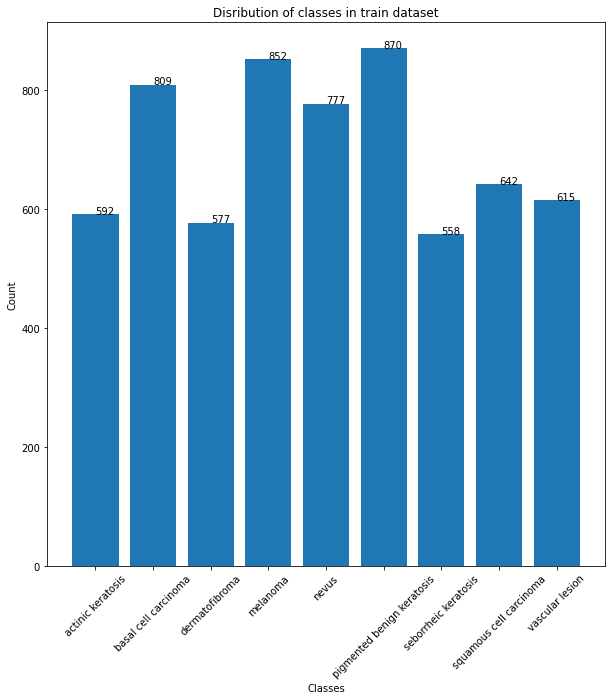

In [28]:
aug_label_count = [n_add + i for i in label_count]
plt.figure(figsize=(10, 10))
plt.bar(class_names,aug_label_count)
plt.xlabel("Classes")
plt.ylabel("Count")
plt.xticks(rotation=45)
for i in range(len(class_names)):
        plt.text(i,aug_label_count[i],aug_label_count[i])
plt.title("Disribution of classes in train dataset")
plt.show()

# Model-3

In [29]:
batch_size = 32
img_height = 180
img_width = 180

In [30]:
data_dir_train_aug="/content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration aug/Train"
train_ds_aug = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train_aug,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [31]:
val_ds_aug = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train_aug,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [45]:
## your code goes here
model_3 = Sequential([
  #data_augmentation,
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(32, 3, padding='same', activation='LeakyReLU'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(32, 3, padding='same', activation='LeakyReLU'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(16, 3, padding='same', activation='LeakyReLU'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Flatten(),
  layers.Dense(128, activation='LeakyReLU'),
  layers.Dense(len(class_names),activation='softmax')
])

In [46]:
## your code goes here
model_3.compile(optimizer="adam",
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model_3.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_5 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_14 (Conv2D)          (None, 180, 180, 32)      896       
                                                                 
 batch_normalization_15 (Bat  (None, 180, 180, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 90, 90, 32)       0         
 g2D)                                                            
                                                                 
 dropout_11 (Dropout)        (None, 90, 90, 32)        0         
                                                                 
 conv2d_15 (Conv2D)          (None, 90, 90, 32)       

#### **Todo:**  Train your model

In [47]:
epochs = 20
history = model_3.fit(
  train_ds_aug,
  validation_data=val_ds_aug,
  epochs=epochs,use_multiprocessing=True
)

Epoch 1/20
169/169 [==============================] - 31s 172ms/step - loss: 2.7986 - accuracy: 0.3861 - val_loss: 5.7655 - val_accuracy: 0.1522
Epoch 2/20
169/169 [==============================] - 30s 172ms/step - loss: 1.4664 - accuracy: 0.5141 - val_loss: 3.9497 - val_accuracy: 0.2472
Epoch 3/20
169/169 [==============================] - 31s 176ms/step - loss: 1.1570 - accuracy: 0.5929 - val_loss: 2.4350 - val_accuracy: 0.3764
Epoch 4/20
169/169 [==============================] - 30s 170ms/step - loss: 0.9693 - accuracy: 0.6573 - val_loss: 1.8157 - val_accuracy: 0.4840
Epoch 5/20
169/169 [==============================] - 30s 170ms/step - loss: 0.7908 - accuracy: 0.7231 - val_loss: 1.1495 - val_accuracy: 0.6563
Epoch 6/20
169/169 [==============================] - 30s 171ms/step - loss: 0.6995 - accuracy: 0.7517 - val_loss: 1.5268 - val_accuracy: 0.5197
Epoch 7/20
169/169 [==============================] - 30s 170ms/step - loss: 0.5585 - accuracy: 0.8019 - val_loss: 1.2202 - val_ac

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()